In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape, df.columns

((48895, 16),
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'],
       dtype='object'))

In [5]:
df = df[[
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']]

In [6]:
df.shape

(48895, 10)

In [7]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df['above_average'] = (df.price >= 152).astype(int)

#### Question 1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [12]:
df.neighbourhood_group.value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64

Split the data

    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value ('price') is not in your dataframe.


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
df_copy_full_train = df_full_train.copy()
df_copy_train = df_train.copy()
df_copy_val = df_val.copy()
df_copy_test = df_test.copy()

In [17]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

y_train_lin = np.log1p(df_train.price.values)
y_val_lin = np.log1p(df_val.price.values)
y_test_lin = np.log1p(df_test.price.values)




del df_train['price']
del df_val['price']
del df_test['price']
del df_full_train['price']
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']


In [18]:
del df_copy_full_train['above_average']
del df_copy_train['above_average']
del df_copy_val['above_average']
del df_copy_test['above_average']


del df_copy_train['price']
del df_copy_val['price']
del df_copy_test['price']


#### Question 2

    Create the correlation matrix for the numerical features of your train dataset.
    In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
    What are the two features that have the biggest correlation in this dataset?


In [19]:
df.dtypes, df.columns

(neighbourhood_group                object
 room_type                          object
 latitude                          float64
 longitude                         float64
 price                               int64
 minimum_nights                      int64
 number_of_reviews                   int64
 reviews_per_month                 float64
 calculated_host_listings_count      int64
 availability_365                    int64
 above_average                       int32
 dtype: object,
 Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price',
        'minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365', 'above_average'],
       dtype='object'))

In [20]:
numerical= ['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']

In [21]:
corrMatrix = df_full_train.corr().abs()

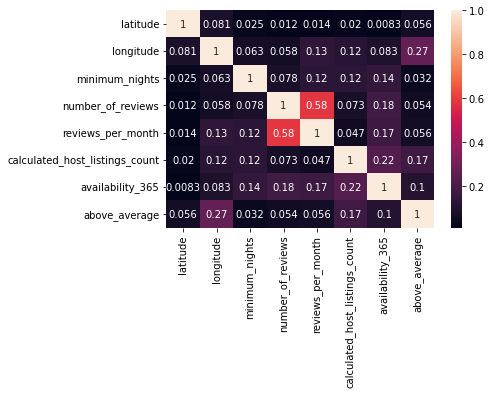

In [22]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Make price binary

    We need to turn the price variable from numeric into binary.
    Let's create a variable above_average which is 1 if the price is above (or equal to) 152

In [23]:
df_full_train = df_full_train.reset_index(drop = True)

In [24]:
df_full_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,entire_home/apt,40.71577,-73.95530,3,11,0.87,1,1,1
1,manhattan,private_room,40.84917,-73.94048,2,2,0.16,1,0,0
2,brooklyn,private_room,40.68993,-73.95947,2,0,0.00,2,0,0
3,brooklyn,entire_home/apt,40.68427,-73.93118,3,87,4.91,1,267,0
4,queens,private_room,40.74705,-73.89564,5,13,0.25,1,0,0
...,...,...,...,...,...,...,...,...,...,...
39111,manhattan,shared_room,40.84650,-73.94319,1,0,0.00,1,0,0
39112,manhattan,private_room,40.73957,-74.00082,2,4,1.90,1,76,0
39113,manhattan,entire_home/apt,40.78318,-73.97372,30,1,0.34,5,261,0
39114,manhattan,entire_home/apt,40.77508,-73.97990,2,11,0.13,1,2,0


#### Question 3

    Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
    Which of these two variables has bigger score?
    Round it to 2 decimal digits using round(score, 2)


In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
mutual_info_score(df_full_train.above_average, df_full_train.neighbourhood_group).round(2)

0.05

In [27]:
mutual_info_score(df_full_train.above_average, df_full_train.room_type).round(2)

0.14

#### Question 4

    Now let's train a logistic regression
    Remember that we have two categorical variables in the data. Include them using one-hot encoding.
    Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.


In [28]:
from sklearn.feature_extraction import DictVectorizer

In [29]:
categorical = ['neighbourhood_group', 'room_type']

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [33]:
model.intercept_[0]

-0.09317894786773952

In [34]:
model.coef_[0].round(4)

array([ 3.0000e-03,  3.6000e-03, -5.8327e+00, -3.1748e+00, -1.1400e-02,
       -1.1090e-01,  1.4260e-01,  1.5935e+00, -1.3600e-02, -1.7049e+00,
       -3.2000e-03, -4.1800e-02,  1.9465e+00, -8.3270e-01, -1.2071e+00])

In [35]:
y_pred = model.predict_proba(X_val)[:, 1]

In [36]:
price_decision = (y_pred >= 0.5)

In [37]:
(y_val == price_decision).mean()

0.7907761529808774

In [38]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = price_decision.astype(int)
df_pred['actual'] = y_val

In [39]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [40]:
accuracy = df_pred.correct.mean()
accuracy

0.7907761529808774

#### Question 5

    We have 9 features: 7 numerical features and 2 categorical.
    Let's find the least useful one using the feature elimination technique.
    Train a model with all these features (using the same parameters as in Q4).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
    Which of following feature has the smallest difference?
        neighbourhood_group
        room_type
        number_of_reviews
        reviews_per_month


In [41]:
categorical = ['neighbourhood_group']
numerical= ['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= 0.5)
acc_rt = (y_val == price_decision).mean()
acc_rt

0.7286021065548625

In [42]:
categorical = ['room_type']
numerical= ['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= 0.5)
acc_ng = (y_val == price_decision).mean()
acc_ng

0.7498721750690255

In [43]:
categorical = ['neighbourhood_group','room_type']
numerical= ['latitude', 'longitude','minimum_nights', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= 0.5)
acc_noR = (y_val == price_decision).mean()
acc_noR

0.7914919725943348

In [44]:
categorical = ['neighbourhood_group','room_type']
numerical= ['latitude', 'longitude','minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count', 'availability_365']

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= 0.5)
acc_rPM = (y_val == price_decision).mean()
acc_rPM

0.7907761529808774

#### Question 6

    For this question, we'll see how to use a linear regression model from Scikit-Learn
    We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
    Fit the Ridge regression model on the training data.
    This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
    Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [45]:
from sklearn.linear_model import Ridge

In [46]:
categorical = ['neighbourhood_group', 'room_type']
numerical= ['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']

dv = DictVectorizer(sparse=False)

train_dict = df_copy_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_copy_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

model = Ridge()
model.fit(X_train, y_train)


Ridge()

In [48]:
model.score(X_train, y_train).round(3)

0.336

In [49]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [51]:
from IPython.display import display

In [63]:
alpha = [0, 0.01, 0.1, 1, 10]


for i in alpha:
    model.set_params(alpha = i)
    display(model.score(X_train, y_train))
    print()

0.3361254804222621

0.3361254804222621

0.3361254804222621

0.3361254804222621

0.3361254804222621